# How to train a neural network in Tensorflow on the COCO dataset

** First, download the Python API: **

Clone the this git directory to your local machine: https://github.com/pdollar/coco. Then run the "make" command from within the PythonAPI folder. To run this notebook, you'll need the packages below as well (matplotlib, numpy, scikit-image, pylab)

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import random
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import tensorflow as tf
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Download the labels

** You don't actually have to download all the images to your computer. just download the relevant annotation files from here: http://mscoco.org/dataset/#download **

For example, my project deals only with human keypoint estimation, so I only downloaded the 2014 Train/Val person keypoints file and the 2015 test data. If you're not sure what you want to do, just download all of the annotation files.

** Your directory structure should look like this: **

```
<PATH_TO_MY_COCO_REPOSITORY>/coco/images/ ...{Images should go here}...
```
```
<PATH_TO_MY_COCO_REPOSITORY>/coco/annotations/ ...{annotation files should go here}...
```


# Initialize the COCO class

In [5]:
# define the path to the annotation file corresponding to the images you want to work with
baseDir='/Users/kyle/Repositories/coco'

trainAnnDir='person_keypoints_train2014'
valAnnDir='person_keypoints_val2014'
testAnnDir='image_info_test_dev2015'

trainDir='train2014'
valDir='val2014'
testDir='dev2015'

annTrainFile='{}/annotations/{}.json'.format(baseDir,trainAnnDir)
annValFile='{}/annotations/{}.json'.format(baseDir,valAnnDir)
annTestFile='{}/annotations/{}.json'.format(baseDir,testAnnDir)

imageTrainFolder='{}/images/{}'.format(baseDir,trainDir)
imageValFolder='{}/images/{}'.format(baseDir,valDir)
imageTestFolder='{}/images/{}'.format(baseDir,testDir)

print(annTrainFile)
print(annValFile)
print(annTestFile)
print(imageTrainFolder)
print(imageValFolder)
print(imageTestFolder)

# initialize a coco object
coco = COCO(annTestFile)

/Users/kyle/Repositories/coco/annotations/person_keypoints_train2014.json
/Users/kyle/Repositories/coco/annotations/person_keypoints_val2014.json
/Users/kyle/Repositories/coco/annotations/image_info_test_dev2015.json
/Users/kyle/Repositories/coco/images/train2014
/Users/kyle/Repositories/coco/images/val2014
/Users/kyle/Repositories/coco/images/dev2015
loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '/Users/kyle/Repositories/coco/annotations/image_info_test_dev2015.json'

# Extract the appropriate images

** Now that we have downloaded the labels and initialialized a COCO object, we can examine the organizational structure of the dataset and specify specific categories of images to download  ** 

In [3]:
# get all images containing the 'person' category
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)

In [4]:
len(imgIds),len(coco.imgs)
# Note: There are exactly 82783 pictures in the train_2014 folder on Google cloud. Just need to parse them.

(21634, 40504)

### Download a few images - you don't have to do this yet 
In my case, I'm just downloading a few to check that things are working

In [9]:
# specify a target directory (images should go in /coco/images/... )
someKeys = imgIds[0:50]

dataDir = '/Users/kyle/Repositories/coco'
dataType = 'val2014'
imagePath = '{}/images/{}'.format(dataDir,dataType)

coco.download(tarDir=imagePath,imgIds=someKeys)

downloaded 0/50 images (t=1.1s)
downloaded 1/50 images (t=0.9s)
downloaded 2/50 images (t=0.8s)
downloaded 3/50 images (t=1.0s)
downloaded 4/50 images (t=1.2s)
downloaded 5/50 images (t=0.9s)
downloaded 6/50 images (t=0.8s)
downloaded 7/50 images (t=0.8s)
downloaded 8/50 images (t=0.8s)
downloaded 9/50 images (t=0.9s)
downloaded 10/50 images (t=1.1s)
downloaded 11/50 images (t=1.9s)
downloaded 12/50 images (t=1.5s)
downloaded 13/50 images (t=0.9s)
downloaded 14/50 images (t=0.9s)
downloaded 15/50 images (t=0.8s)
downloaded 16/50 images (t=0.9s)
downloaded 17/50 images (t=1.1s)
downloaded 18/50 images (t=0.8s)
downloaded 19/50 images (t=0.9s)
downloaded 20/50 images (t=0.8s)
downloaded 21/50 images (t=1.0s)
downloaded 22/50 images (t=1.0s)
downloaded 23/50 images (t=0.8s)
downloaded 24/50 images (t=0.8s)
downloaded 25/50 images (t=0.8s)
downloaded 26/50 images (t=0.8s)
downloaded 27/50 images (t=0.7s)
downloaded 28/50 images (t=1.7s)
downloaded 29/50 images (t=1.0s)
downloaded 30/50 ima

In [326]:
filenames = tf.constant(['{}/COCO_train2014_{:0>12}.jpg'.format(imagePath,img_ID) for img_ID in imgIds])

filename = '{}/COCO_train2014_{:0>12}.jpg'.format(imagePath,imgIds[0])
imgString = tf.read_file(filename)
tfIMG = tf.image.decode_jpeg(imgString)

In [327]:
myIMG, myFiles = sess.run([tfIMG, filenames])
# plt.imshow(myIMG)
# plt.show()

In [ ]:
img['id']

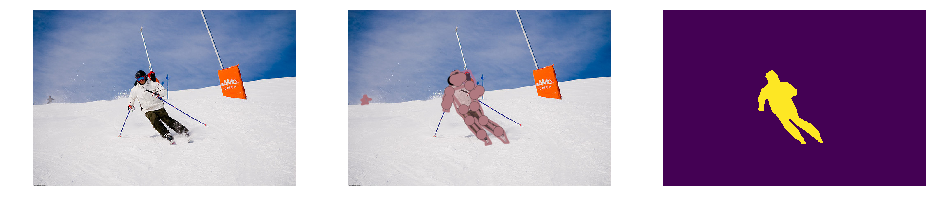

In [25]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0] # select a random image
# img = coco.loadImgs(imgIds[np.random.randint(0,100)])[0] # select a random image

# img = coco.loadImgs(crowdFinder())[0] # select a random image


I = io.imread('http://mscoco.org/images/%d'%(img['id'])) # use url to load image
# I = io.imread('{}/COCO_train2014_000000000{}'.format(imagePath,)
                           
# anns is a list. Each element of anns is a dictionary corresponding to an instance of a person
# anns[0]['keypoints'] is a list of (u,v,flag) coordinates. flag: 0=>not included, 1=>occluded, 2=>visible
# anns[0]['iscrowd]: 0=>No,1=>Yes

# Display image
plt.figure(figsize=[16,8])
plt.subplot(1,3,1)
plt.imshow(I) 
plt.axis('off')

# load and display instance annotations
plt.subplot(1,3,2)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
anns[0]['keypoints'][0:3]

# turn segmentation into a mask
plt.subplot(1,3,3)
bool_mask = coco.annToMask(anns[0])
plt.imshow(bool_mask)
plt.axis('off')
plt.show()

In [26]:
anns

[{'area': 10098.62275,
  'bbox': [230.92, 146.38, 159.69, 181.53],
  'category_id': 1,
  'id': 497976,
  'image_id': 246985,
  'iscrowd': 0,
  'keypoints': [264,
   172,
   2,
   266,
   165,
   2,
   258,
   168,
   2,
   274,
   162,
   2,
   252,
   169,
   1,
   294,
   181,
   2,
   246,
   196,
   2,
   318,
   193,
   2,
   242,
   215,
   2,
   307,
   203,
   2,
   238,
   228,
   2,
   306,
   233,
   2,
   279,
   241,
   2,
   328,
   266,
   2,
   293,
   266,
   2,
   364,
   294,
   2,
   324,
   302,
   2],
  'num_keypoints': 17,
  'segmentation': [[334.65,
    327.91,
    335.11,
    320.18,
    318.73,
    311.08,
    295.07,
    286.06,
    279.15,
    259.67,
    266.41,
    247.84,
    252.76,
    212.81,
    248.67,
    222.36,
    245.03,
    232.37,
    245.03,
    246.48,
    238.2,
    245.57,
    231.38,
    244.2,
    233.65,
    231.92,
    230.92,
    214.17,
    238.66,
    197.79,
    239.11,
    192.79,
    255.49,
    180.05,
    255.04,
    170.5,
   

In [291]:
def crowdFinder():
    id = None
    random.shuffle(imgIds)
    for id in imgIds:
        annIds = coco.getAnnIds(imgIds=id, catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        if sum([ann['iscrowd'] for ann in anns]) > 0:
            break
    return id

crowdID = crowdFinder()
crowdID

102655

In [290]:
for ann in anns:
    print('num kp:',len(ann['keypoints']),'----- crowd:',ann['iscrowd'],'----- seg:', 
          len(ann['segmentation']),'----- bbox:',ann['bbox'])

num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [78.89, 382.98, 82.95, 202.57]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [248.11, 402.34, 11.5, 26.9]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [311.57, 400.81, 14.71, 35.72]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [331.94, 400.97, 10.25, 21.63]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [342.08, 407.56, 24.83, 52.25]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [381.18, 400.22, 13.1, 30.7]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [179.69, 376.69, 78.4, 190.79]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [369.96, 401.81, 11.04, 27.47]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [253.85, 403.59, 25.13, 52.52]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [400.26, 398.37, 7.47, 15.41]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [276.83, 402.29, 23.57, 40.87]
num kp: 51 ----- crowd: 0 ----- seg: 1 ----- bbox: [161.02, 419.06, 31.73, 78.84]
num kp: 51 ----- crow

In [ ]:
scale = 0.75

for ann in anns:
    ann['area'] = ann['area']*scale**2
    ann['bbox'] = [i*scale for i in ann['bbox']]
    ann['keypoints'] = np.reshape(ann['keypoints'],(-1,3))*np.array([scale, scale, 1])
    ann['segmentation'] = ann['segmentation']*scale
    

In [ ]:
np.reshape(anns[0]['keypoints'],(-1,3))*np.array([.75, .75, 1])

# Prepare data to feed into network 
### Concatenate labels as tensors

In [ ]:
def getImage(img_ID)
    pass

def getAnnotations(img_ID)
    pass



In [372]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def _parse_function(img_ID):
    imagePath = '/Users/kyle/Repositories/coco/images/person_keypoints_train2014'
    filename = '{}/COCO_train2014_{:0>12}.jpg'.format(imagePath, img_ID)
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_image(image_string)
    
    # load coco annotations and convert to tensor form
    anns = coco.loadAnns(coco.getAnnIds(imgIds=img_ID, catIds=catIds, iscrowd=None))
    bbox_tensor = tf.stack([tf.constant(ann['bbox'],dtype=precision) for ann in anns], axis=0)
    keypoints_tensor = tf.stack([tf.constant(np.reshape(ann['keypoints'],(-1,3)), dtype=precision) for ann in anns], axis=0)
    crowd_tensor = tf.stack([tf.constant([ann['iscrowd']]) for ann in anns],axis=0)
    area_tensor = tf.stack([tf.constant([ann['area']],dtype=precision) for ann in anns], axis=0)

    mask_tensor = tf.stack([tf.constant(coco.annToMask(ann), dtype=tf.bool) for ann in anns], axis = 0)
#     image_resized = tf.image.resize_images(image_decoded, [28, 28])
    return image_decoded, bbox_tensor, keypoints_tensor, crowd_tensor, area_tensor, mask_tensor

def _get_annotations(imgIDs)

imgID_tensor = tf.constant(imgIds)
# filenames = tf.constant(['{}/COCO_train2014_{:0>12}.jpg'.format(imagePath,img_ID) for img_ID in imgIds])
ann_files = tf.constant(coco.getAnnIds(imgIds))

dataset = tf.contrib.data.Dataset.from_tensor_slices((filenames, labels))
dataset = dataset.map(_parse_function)

In [ ]:
myCocoDataset = tf.contrib.datata.Dataset.from_tensor_slices((imgIds))

In [363]:
imagePath

'/Users/kyle/Repositories/coco/images/person_keypoints_train2014'

In [362]:
imgID_tensor = tf.constant(imgIds)

In [346]:
annotations = coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=None)
# tf.constant(coco.loadAnns(coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=None)))

In [354]:
img = coco.loadImgs(imgIds[np.random.randint(0,100)])[0] # select a random image
annotations = [coco.getAnnIds(id, catIds=catIds, iscrowd=None) for id in imgIds]

In [ ]:
tf.constant(annotations)

In [345]:
filenames

<tf.Tensor 'Const_1646:0' shape=(45174,) dtype=string>

In [335]:
ann_file = allAnns[0]
anns = coco.loadAnns(ann_file)

In [37]:
sess = tf.Session()

In [27]:
precision = tf.float16

bbox_tensor = tf.stack([tf.constant(ann['bbox'],dtype=precision) for ann in anns], axis=0)
keypoints_tensor = tf.stack([tf.constant(np.reshape(ann['keypoints'],(-1,3)), dtype=precision) for ann in anns], axis=0)
crowd_tensor = tf.stack([tf.constant([ann['iscrowd']]) for ann in anns],axis=0)
area_tensor = tf.stack([tf.constant([ann['area']],dtype=precision) for ann in anns], axis=0)
mask_tensor = tf.stack([tf.constant(coco.annToMask(ann), dtype=tf.bool) for ann in anns], axis = 0)

In [29]:
sess= tf.Session()
bbox, kpts, crowds, areas, masks = sess.run([bbox_tensor, keypoints_tensor, crowd_tensor, area_tensor, mask_tensor])
bbox.shape, kpts.shape, crowds.shape, areas.shape, masks.shape

((3, 4), (3, 17, 3), (3, 1), (3, 1), (3, 428, 640))

### Junk